In [1]:
import pandas as pd; import os; import time; import re;
import numpy as np; import random; import copy; import sys

In [2]:
# read review data
data = pd.read_csv('unsorted_corpus.csv')

F:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,

In [3]:
data.shape

(310668, 534)

In [41]:
data.head(5)

,business_id,stars,0,1,2,3,4,5,6,7,...,522,523,524,525,526,527,528,529,530,531
0,112310,4.0,first,admit,not,excite,go,la,tavolta,food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10013,5.0,not,find,anything,wrong,place,pasta,pizza,amaze,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97870,3.0,good,selection,class,beer,main,twicefirst,time,fry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33094,4.0,food,always,good,price,reasonable,although,not,exactly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9439,2.0,go,last,weekend,pretty,disappoint,not,one,thing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data1st=data[data['stars']<2.75]

In [27]:
data1st.shape

(70329, 534)

In [26]:
del data

In [21]:
#data1st.iloc[1]

In [12]:
# below is the lda model for average stars under 25% quantile

corpus1 = []
for i in range(data1st.shape[0]):
    print(i)
    temp = []
    for k in range(2,534):
        if not data1st.iloc[i].notnull()[k]:
            break
        elif data1st.iloc[i].notnull()[k]:
            temp.append(data1st.iloc[i][k])
    corpus1.append(temp)

In [31]:
print(corpus1[])

[['go', 'last', 'weekend', 'pretty', 'disappoint', 'not', 'one', 'thing', 'picture', 'recommend', 'yelp', 'good', 'start', 'steak', 'grill', 'skewer', 'ok', 'nothing', 'special', 'freind', 'get', 'lasagna', 'get', 'special', 'chicken', 'dish', 'pretty', 'bland', 'lack', 'kick', 'waitress', 'nice', 'get', 'manger', 'switch', 'dish', 'freind', 'get', 'hamburger', 'get', 'shrimp', 'scampi', 'hamburger', 'better', 'lasagna', 'still', 'lack', 'flavor', 'scampi', 'better', 'chicken', 'still', 'season', 'noodle', 'bite', 'cook', 'big', 'name', 'attach', 'restaurant', 'go', 'empty', 'stomach', 'high', 'hop', 'service', 'great', 'give', 'average'], ['th', 'service', 'hit', 'miss', 'sometimes', 'staff', 'personable', 'attentive', 'time', 'ask', 'come', 'staff', 'often', 'gtfoh', 'stamp', 'place', 'permanently', 'across', 'forehead', 'patron', 'go', 'otherwise', 'deem', 'guy', 'say', 'continuo', 'visit', 'great', 'hh', 'several', 'option', 'close', 'home', 'food', 'drink', 'option', 'choose', 'th

In [33]:
import copy

In [135]:
test=copy.deepcopy(corpus1)

In [ ]:
# some oberservations contain fload type, skip them

In [136]:
test=test[0:9000]+test[11000:20000]

In [118]:
print(test)

[['not', 'eat', 'gf', 'crust', 'celiac', 'definitely', 'not', 'gf', 'usually', 'deal', 'little', 'bite', 'unavoidable', 'contamination', 'reaction', 'crust', 'actually', 'contain', 'gluten', 'careful', 'pricey', 'give', 'quality', 'actual', 'pizza', 'definitely', 'big', 'no', 'no']]


In [137]:
len(test)

18000

In [138]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(test)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in test]


In [139]:
lda25=gensim.models.ldamodel.LdaModel

In [140]:
ldamodel = lda25(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [145]:
print(ldamodel.print_topics(num_topics=3, num_words=5))

[(2, '0.030*"not" + 0.023*"place" + 0.020*"go" + 0.012*"like" + 0.010*"make"'), (1, '0.038*"minute" + 0.032*"wait" + 0.027*"order" + 0.020*"0" + 0.020*"get"'), (9, '0.023*"de" + 0.015*"un" + 0.015*"la" + 0.013*"le" + 0.010*"et"')]


In [148]:
from gensim.models import CoherenceModel

In [149]:
for i in range(5,11):
    print(i)
    ldamodel = lda25(doc_term_matrix, num_topics=i,id2word = dictionary,alpha='auto', passes=50)
    print('\nperplexity:',ldamodel.log_perplexity(doc_term_matrix))
    coherence=CoherenceModel(model=ldamodel,texts=test,dictionary=dictionary,coherence='c_v')
    coherence_lda=coherence.get_coherence()
    print('\ncoherence score:', coherence_lda)

5

perplexity: -7.133904817187126

coherence score: 0.39894463203835373
6

perplexity: -7.151223596691777

coherence score: 0.4166031008699979
7

perplexity: -7.194402285931064

coherence score: 0.4270586626519572
8

perplexity: -7.260929343466757

coherence score: 0.4685771167816004
9

perplexity: -7.329819104750044

coherence score: 0.44112316505706334
10

perplexity: -7.4183457156719435

coherence score: 0.46979840656354144


In [150]:
ldamodel = lda25(doc_term_matrix, num_topics=10, id2word = dictionary,alpha='auto', passes=50)

In [158]:
#print(ldamodel.print_topics(num_topics=10, num_words=10))

In [159]:
#print(ldamodel.show_topics(formatted=False))

In [247]:
#plot of coherence
coh=[0.39894463203835373,0.4166031008699979,0.4270586626519572,0.4685771167816004,0.44112316505706334,0.46979840656354144]
per=[-7.133904817187126,-7.151223596691777,-7.194402285931064,-7.260929343466757,-7.329819104750044,-7.4183457156719435]
per=[float(i)/max(per) for i in per]
N_topics=[5,6,7,8,9,10]

In [248]:
per

[1.0,
 1.0024276717938436,
 1.0084802741688095,
 1.0178057500814424,
 1.0274624196121762,
 1.0398716980074556]

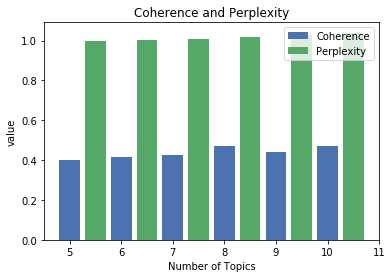

In [249]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.bar(N_topics, coh, width=.4,label='Coherence')

plt.bar([5.5,6.5,7.5,8.5,9.5,10.5],per, width=.4,label='Perplexity')


plt.legend()

plt.xlabel('Number of Topics')
plt.ylabel('value')

plt.title('Coherence and Perplexity')

plt.show()


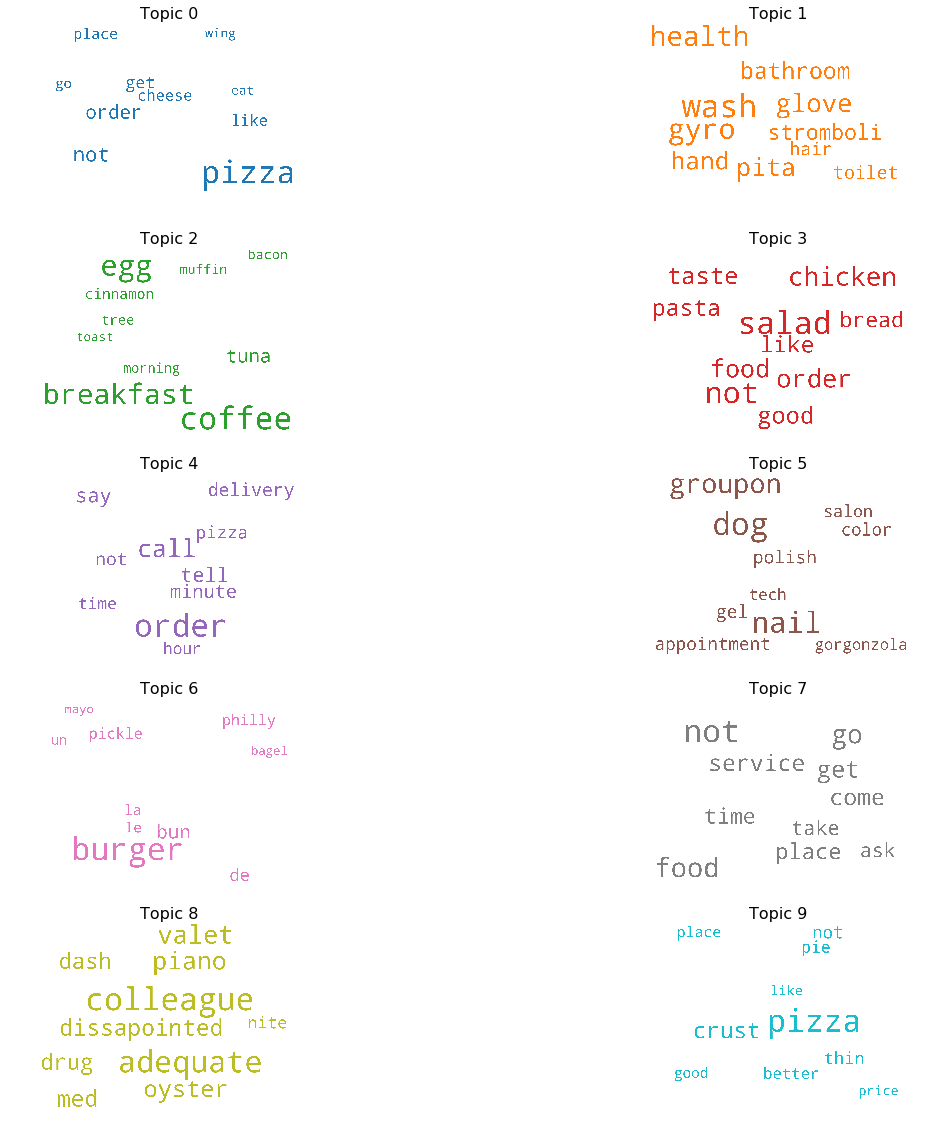

In [246]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
 
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
 
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                 height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
 
topics = ldamodel.show_topics(formatted=False)
 
fig, axes = plt.subplots(5, 2, figsize=(20,20), sharex=True, sharey=True)
 
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

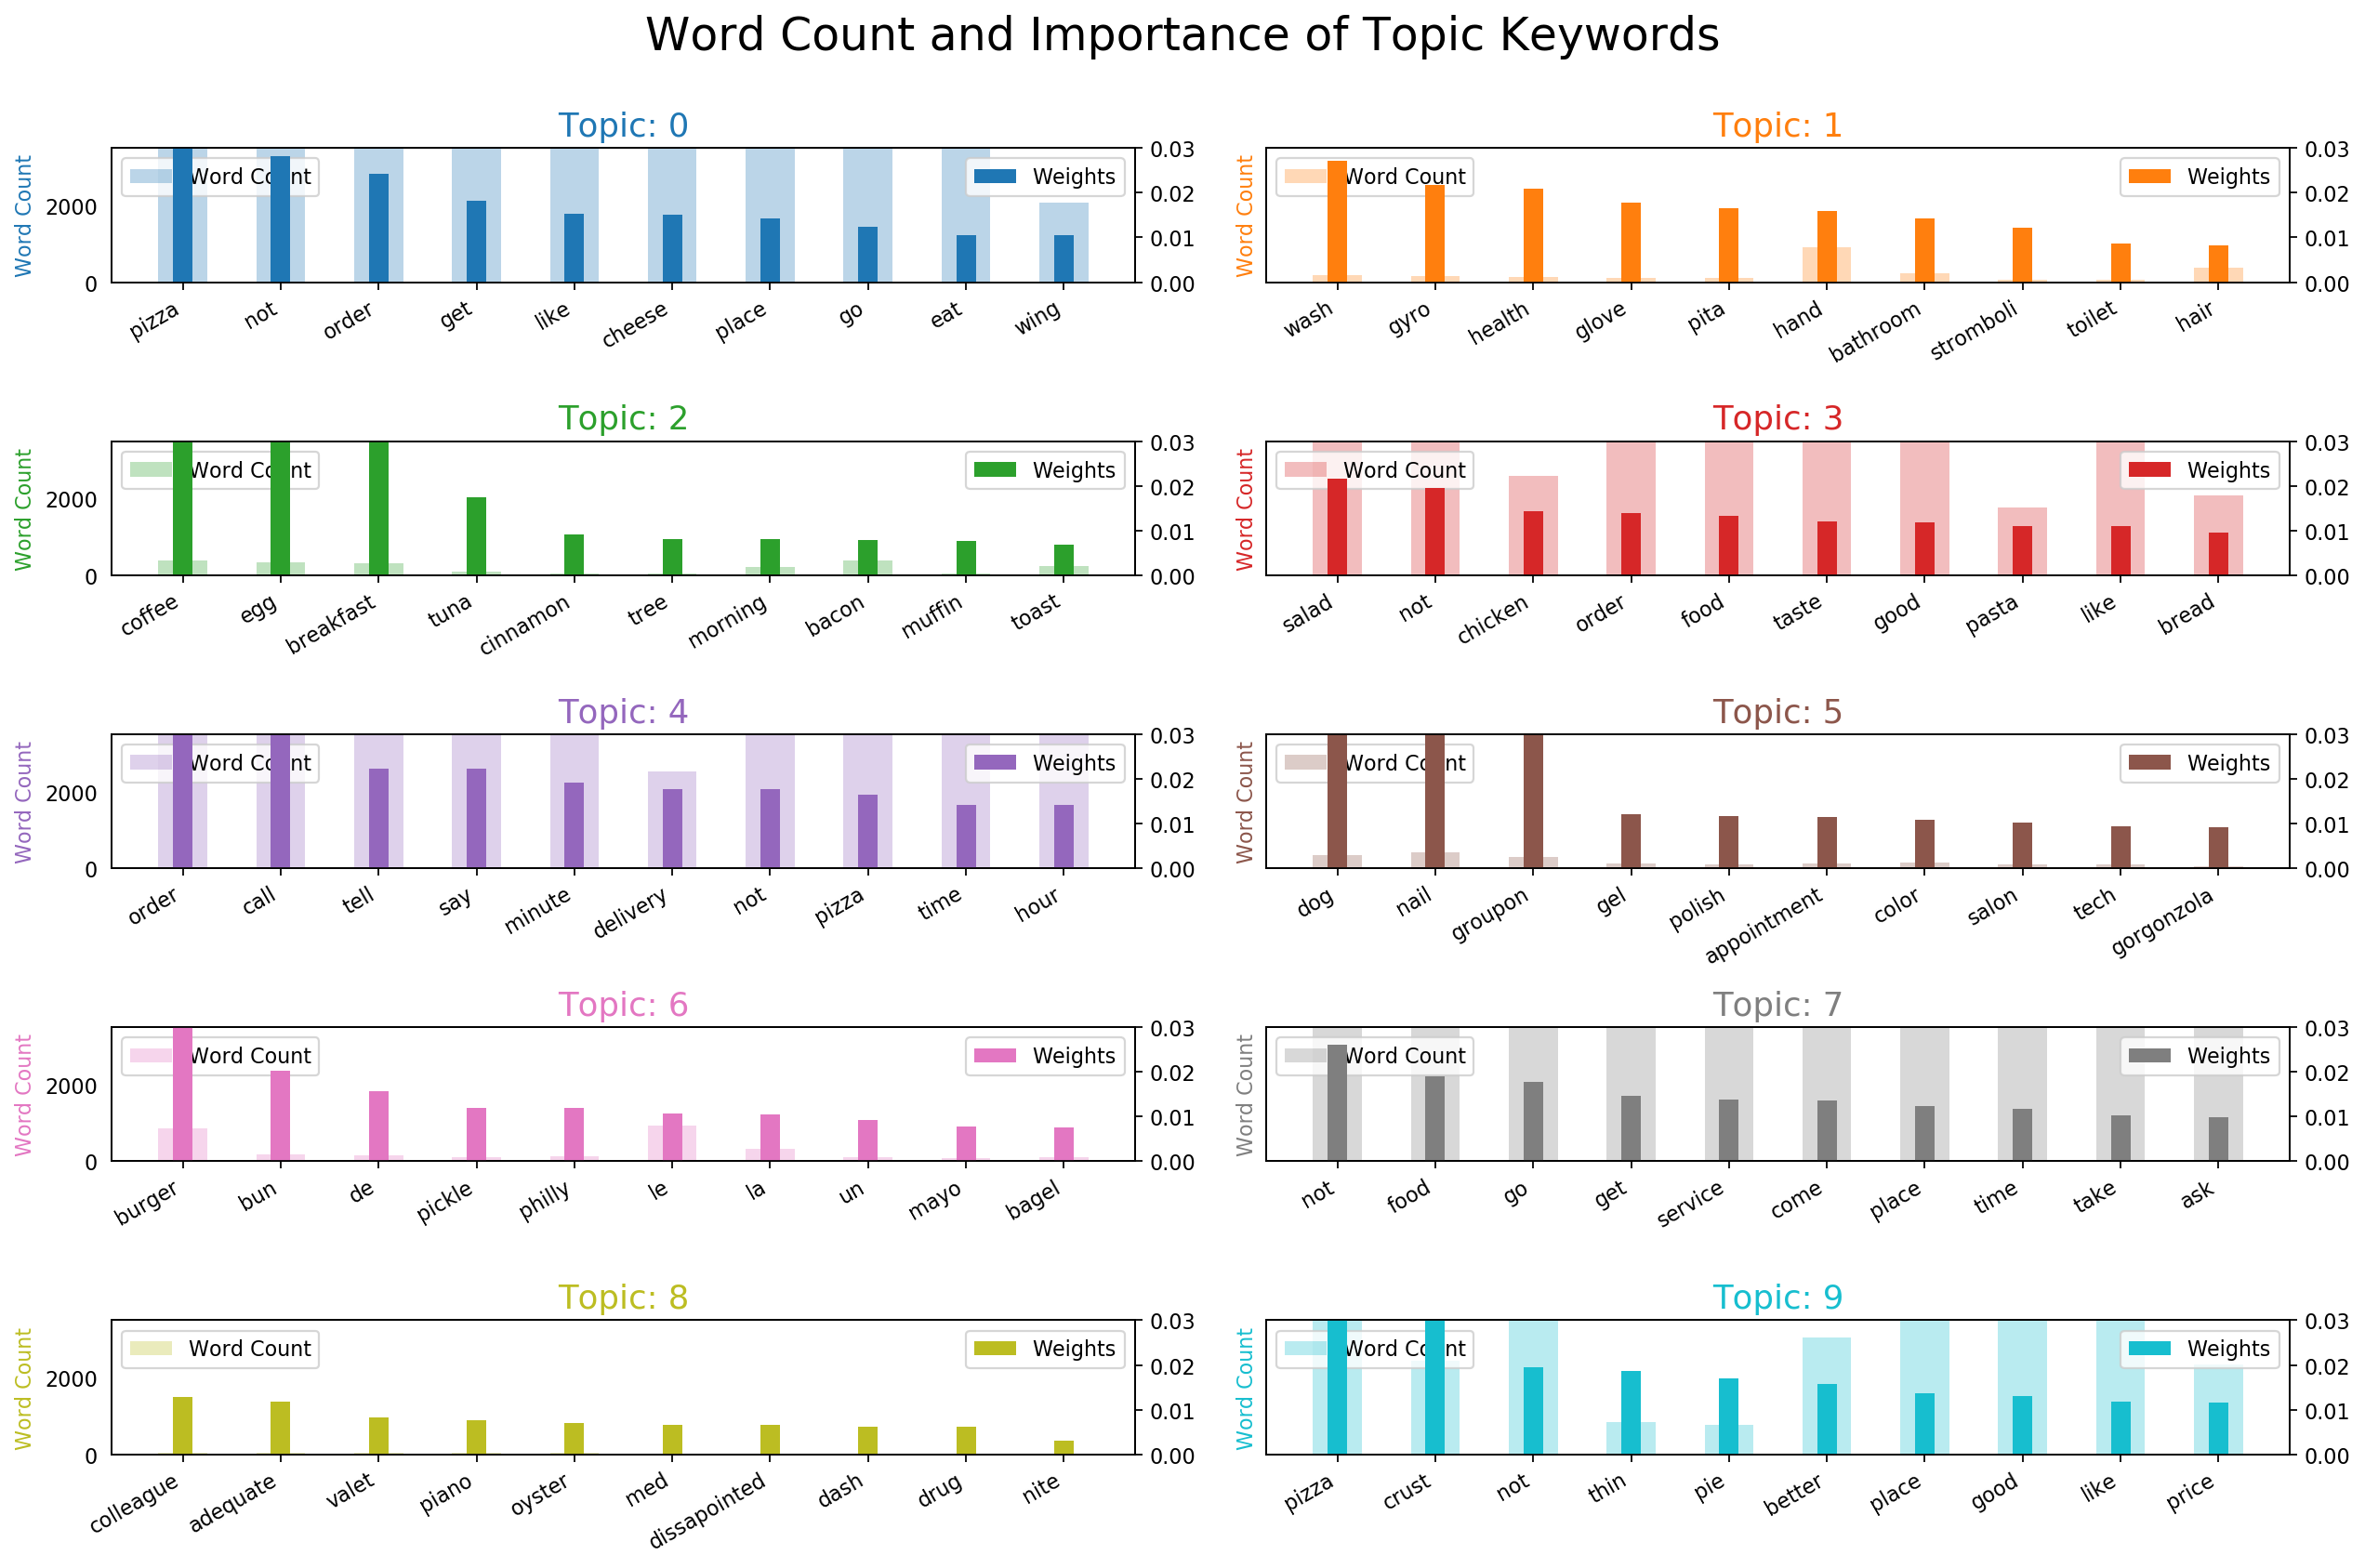

In [250]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in test for w in w_list]
counter = Counter(data_flat)
 
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])
 
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
 
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
 
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()